# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousestudy_df = pd.merge(mouse_metadata, study_results, how="right")

# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [40]:
# Checking the number of mice.
mousestudy_df["Mouse ID"].nunique()

249

In [41]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mousestudy_df[mousestudy_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mousestudy_df[mousestudy_df["Mouse ID"].isin(duplicate_mouse)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousedf_clean = mousestudy_df[~mousestudy_df["Mouse ID"].isin(duplicate_mouse)]
mousedf_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [44]:
# Checking the number of mice in the clean DataFrame.
mousedf_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mousedf_mean = mousedf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mousedf_median = mousedf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mousedf_var = mousedf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mousedf_std = mousedf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mousedf_sem = mousedf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
mousedf_stats = pd.DataFrame({"Mean Tumor Volume":mousedf_mean,
                              "Median Tumor Volume":mousedf_median,
                              "Tumor Volume Variance":mousedf_var,
                              "Tumor Volume Std. Dev.":mousedf_std,
                              "Tumor Volume Std. Err.":mousedf_sem,})
mousedf_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mousedf_stats = mousedf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 
                                                                                 'median',
                                                                                 'var',
                                                                                'std',
                                                                                'sem'])
mousedf_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

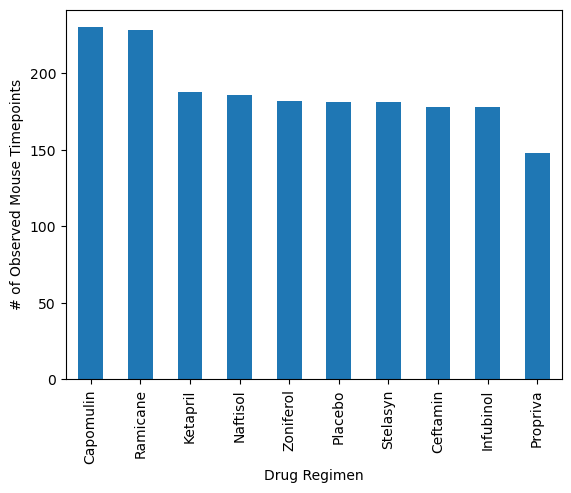

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = mousedf_clean.groupby("Drug Regimen")["Timepoint"].count()
timepoints = timepoints.sort_values(ascending=False)
mousebar = timepoints.plot(kind='bar', ylabel = "# of Observed Mouse Timepoints")
plt.show()

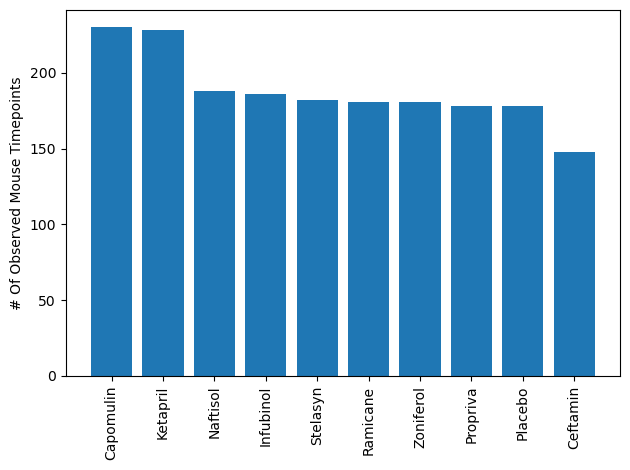

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mousedf_clean["Drug Regimen"].unique()))
y_axis = mousedf_clean.groupby("Drug Regimen")["Timepoint"].count()
y_axis = y_axis.sort_values(ascending=False)
plt.xticks(x_axis, mousedf_clean["Drug Regimen"].unique(), rotation=90)
plt.bar(x_axis, y_axis)
plt.ylabel("# Of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

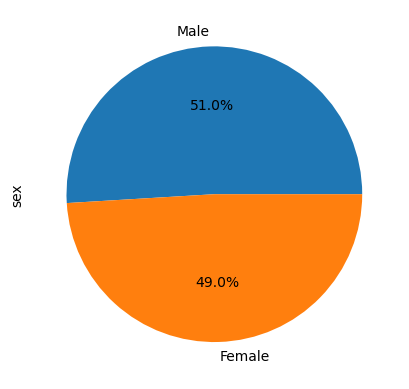

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mousedf_clean["Sex"].value_counts()
mousepie = sex.plot(kind='pie', ylabel = "sex", autopct='%1.1f%%')
plt.show()

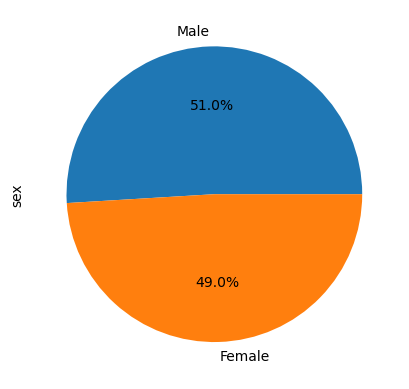

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = mousedf_clean["Sex"].value_counts()
labels = ["Male", "Female"]
plt.pie(sex, labels=labels, autopct='%1.1f%%',)
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = mousedf_clean.groupby("Mouse ID")["Timepoint"].last()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mousemerge = pd.merge(mousedf_clean, final_timepoint, on="Mouse ID", how="inner", suffixes=("", "_final"))
mousemerge_final = mousemerge[mousemerge["Timepoint"] == mousemerge["Timepoint_final"]].reset_index(drop=True)
mousemerge_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint_final
0,b128,Capomulin,Female,9,22,45,38.982878,2,45
1,f932,Ketapril,Male,15,29,0,45.000000,0,0
2,g107,Ketapril,Female,2,29,35,71.905117,0,35
3,a457,Ketapril,Female,11,30,10,49.783419,0,10
4,c819,Ketapril,Male,21,25,40,62.175705,1,40
...,...,...,...,...,...,...,...,...,...
243,t565,Capomulin,Female,20,17,45,34.455298,0,45
244,i557,Capomulin,Female,1,24,45,47.685963,1,45
245,m957,Capomulin,Female,3,19,45,33.329098,1,45
246,f966,Capomulin,Male,16,17,20,30.485985,0,20


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

newtreatmentdf = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for treatment in Treatments:
    # Makes a new dataframe consisting only of the drug regimens listed in the treatments
    treatment_df = mousemerge_final[mousemerge_final["Drug Regimen"] == treatment]
    
    # Sets the volume to the tumor volume and adds it to the tumorvol list
    volumes = treatment_df["Tumor Volume (mm3)"]
    tumorvol.append(volumes)
    
    # Adds it to a new dataframe so that it doesn't get reset after the for loop
    newtreatmentdf = pd.concat([treatment_df, newtreatmentdf], ignore_index=True)

# New dataframes consisting of each type of treatment
Capomulin = newtreatmentdf.loc[(newtreatmentdf["Drug Regimen"] == "Capomulin")]
Ramicane = newtreatmentdf.loc[(newtreatmentdf["Drug Regimen"] == "Ramicane")]
Infubinol = newtreatmentdf.loc[(newtreatmentdf["Drug Regimen"] == "Infubinol")]
Ceftamin = newtreatmentdf.loc[(newtreatmentdf["Drug Regimen"] == "Ceftamin")]

# Makes a series for each treatment and their volume
Capomulinvolume = Capomulin["Tumor Volume (mm3)"]
Ramicanevolume = Ramicane["Tumor Volume (mm3)"]
Infubinolvolume = Infubinol["Tumor Volume (mm3)"]
Ceftaminvolume = Ceftamin["Tumor Volume (mm3)"]

# Determine outliers using upper and lower bounds
volumelist = [Capomulinvolume, Ramicanevolume, Infubinolvolume, Ceftaminvolume]
outlierbounds = []
for volumelist in volumelist:
    quartiles = volumelist.quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    outlierbounds.append((lower_bound, upper_bound))

# Empty list for each treatment's outliers
capomulinoutlier = []
ramicaneoutlier = []
infubinoloutlier = []
ceftaminoutlier = []

# Determines outliers for each treatment
for i, x in enumerate(newtreatmentdf["Tumor Volume (mm3)"]):
    if newtreatmentdf["Drug Regimen"][i] == "Capomulin":
        if newtreatmentdf["Tumor Volume (mm3)"][i] < outlierbounds[0][0] or newtreatmentdf["Tumor Volume (mm3)"][i] > outlierbounds[0][1]:
            capomulinoutlier.append(newtreatmentdf["Tumor Volume (mm3)"][i])
    elif newtreatmentdf["Drug Regimen"][i] == "Ramicane":
        if newtreatmentdf["Tumor Volume (mm3)"][i] < outlierbounds[1][0] or newtreatmentdf["Tumor Volume (mm3)"][i] > outlierbounds[1][1]:
            ramicaneoutlier.append(newtreatmentdf["Tumor Volume (mm3)"][i])
    elif newtreatmentdf["Drug Regimen"][i] == "Infubinol":
        if newtreatmentdf["Tumor Volume (mm3)"][i] < outlierbounds[2][0] or newtreatmentdf["Tumor Volume (mm3)"][i] > outlierbounds[2][1]:
            infubinoloutlier.append(newtreatmentdf["Tumor Volume (mm3)"][i])
    elif newtreatmentdf["Drug Regimen"][i] == "Ceftamin":
        if newtreatmentdf["Tumor Volume (mm3)"][i] < outlierbounds[3][0] or newtreatmentdf["Tumor Volume (mm3)"][i] > outlierbounds[3][1]:
            ceftaminoutlier.append(newtreatmentdf["Tumor Volume (mm3)"][i])


print(f"Capomulin's potential outliers:", capomulinoutlier)
print(f"Ramicane's potential outliers: ", ramicaneoutlier)
print(f"Infubinol's potential outliers: ", infubinoloutlier)
print(f"Ceftamin's potential outliers: ", ceftaminoutlier)

Capomulin's potential outliers: []
Ramicane's potential outliers:  []
Infubinol's potential outliers:  [36.3213458]
Ceftamin's potential outliers:  []


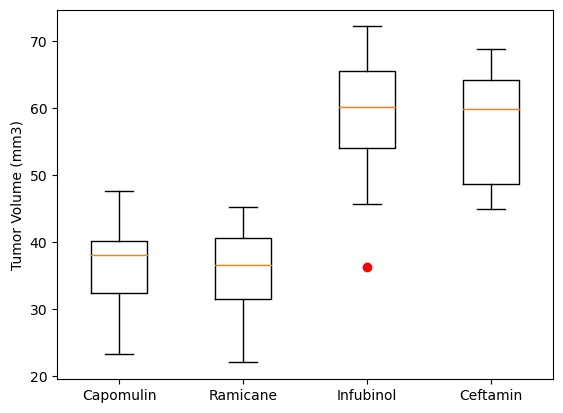

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
plt.boxplot(tumorvol, 0, 'ro', labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_ylabel("Tumor Volume (mm3)")
marker_style = dict(marker = 'o', markerfacecolor = 'r', markersize = 8, markeredgecolor = 'black')

plt.show()

## Line and Scatter Plots

In [54]:
# Makes a new dataframe for mouse l509 and only for capomulin.
l509mouse = mousedf_clean.loc[(mousedf_clean["Mouse ID"] == "l509") & (mousedf_clean["Drug Regimen"] == "Capomulin"), :] 
l509mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
231,l509,Capomulin,Male,17,21,0,45.000000,0
253,l509,Capomulin,Male,17,21,5,45.851193,0
539,l509,Capomulin,Male,17,21,10,46.759074,0
881,l509,Capomulin,Male,17,21,15,47.488599,1
982,l509,Capomulin,Male,17,21,20,48.070452,2
1146,l509,Capomulin,Male,17,21,25,44.006257,2
1414,l509,Capomulin,Male,17,21,30,44.708055,2
1499,l509,Capomulin,Male,17,21,35,40.207288,2
1723,l509,Capomulin,Male,17,21,40,40.770813,2
1771,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0.5, 1.0, 'Capomulin Treatment of mouse l509')

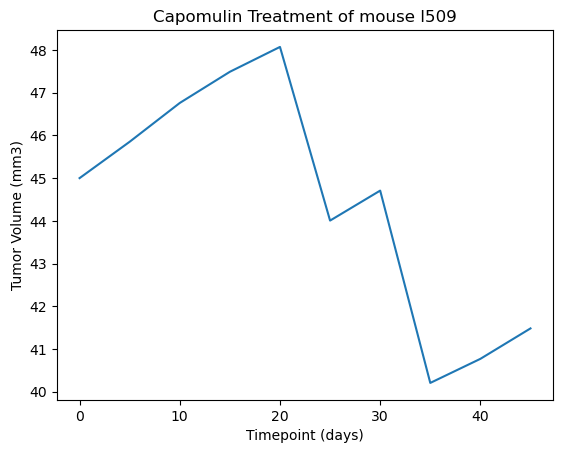

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(l509mouse["Timepoint"], l509mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")

In [59]:
cap = mousedf_clean.loc[(mousedf_clean["Drug Regimen"] == "Capomulin")]
average_weight = cap.groupby("Mouse ID")["Weight (g)"].unique()
average_tumor_volume = cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

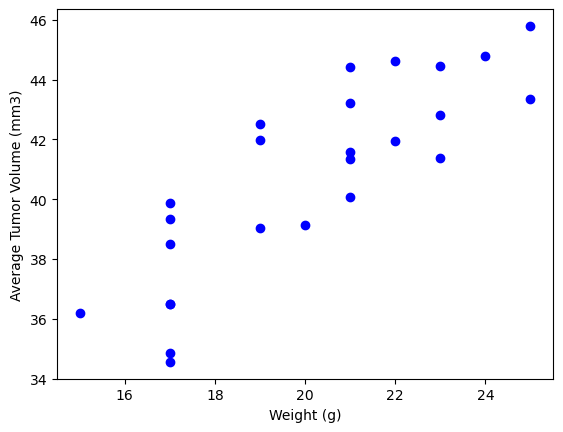

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(average_weight, average_tumor_volume, marker='o', facecolors='b')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is [0.84]


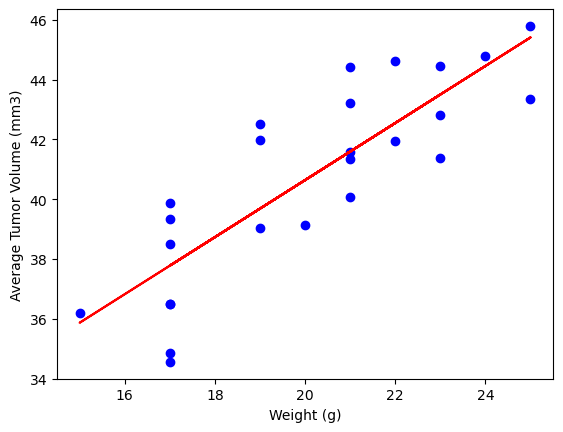

In [76]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(average_weight, average_tumor_volume, marker='o', facecolors='b')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_weight.astype(float), average_tumor_volume.astype(float))
regress_values = average_weight * slope + intercept
plt.plot(average_weight,regress_values,'r-')
correlation = st.pearsonr(average_weight, average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {np.round(correlation[0],2)}")